<a href="https://colab.research.google.com/github/hemalathasrianusuri/Leaf_Disease_Detection-_Using_CNN/blob/main/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/data/plantdiseaseProject.zip

Streaming output truncated to the last 5000 lines.
  inflating: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/301b0319-e28a-44ee-836c-92a5e8a5b478___RS_L.Scorch 1558_flipLR.JPG  
  inflating: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/30d8e2ff-ae19-4d1b-be24-cb14e131eadc___RS_L.Scorch 1344_flipLR.JPG  
  inflating: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/30e43c7d-0621-4827-8a3a-3ae771996f1e___RS_L.Scorch 9959.JPG  
  inflating: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/320d687e-0c4f-4ecc-bf4c-b2d1aaf2fd20___RS_L.Scorch 0855_flipLR.JPG  
  inflating: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/33456e3e-53a3-4be9-be9c-64fe7cd821a8___RS_L.Scorch 1355.JPG  
  inflating: New P

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input ,decode_predictions

In [ ]:
len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function= preprocess_input )

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
train.class_indices
d= train.class_indices

In [ ]:
dict(zip(d.values(),d.keys()))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
 t_img , label = train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

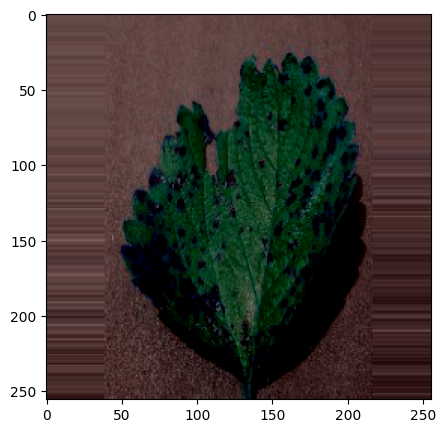

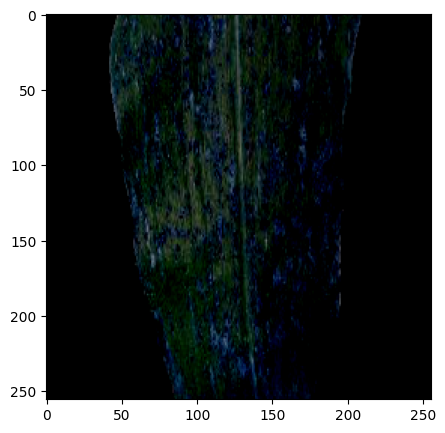

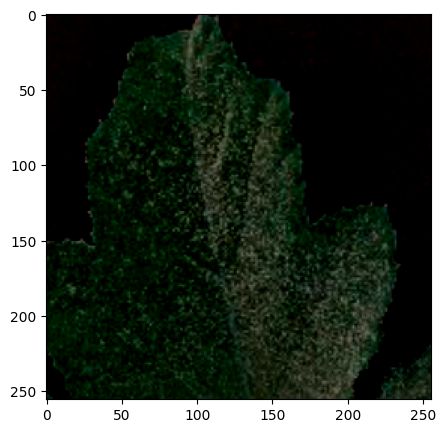

In [ ]:
plotImage(t_img[:4], label[:3])

# *Building the Model*

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units= 38 , activation='softmax')(X)

#Creating the Model
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Early Stopping and Model Check point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es= EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience= 3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor= 'val_accuracy', min_delta=0.01, patience= 3, verbose=1, save_best_only= True)
cb = [es, mc]


In [ ]:
his= model.fit_generator(train ,
                          steps_per_epoch= 16,
                          epochs= 20 ,
                          verbose= 1 ,
                          callbacks= cb ,
                          validation_data= val ,
                          validation_steps= 16 , )

<ipython-input-31-2b3d8d3087c9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his= model.fit_generator(train ,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 10.0273 - accuracy: 0.6348
Epoch 1: val_accuracy did not improve from 0.79297
16/16 [==============================] - 14s 776ms/step - loss: 10.0273 - accuracy: 0.6348 - val_loss: 8.5942 - val_accuracy: 0.7383
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 10.4538 - accuracy: 0.6445
Epoch 2: val_accuracy did not improve from 0.79297
16/16 [==============================] - 12s 745ms/step - loss: 10.4538 - accuracy: 0.6445 - val_loss: 5.6256 - val_accuracy: 0.7832
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 8.0232 - accuracy: 0.7070
Epoch 3: val_accuracy did not improve from 0.79297
16/16 [==============================] - 15s 948ms/step - loss: 8.0232 - accuracy: 0.7070 - val_loss: 7.9140 - val_accuracy: 0.7344
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 9.3729 - accuracy: 0.6934
Epoch 4: val_accuracy did not improve from 0.79297
16/16 [=============

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-36-3dd475e0eb34>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is = 77.41861939430237 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis=0)
  pred =np.argmax(model.predict(img))
  print(f"the image belongs to {ref[pred]}")

In [ ]:
path ="/content/New Plant Diseases Dataset(Augmented)/test/test/AppleCedarRust4.JPG"
prediction(path)
# "C:\Users\user\Desktop\New Plant Diseases Dataset(Augmented)\test\test\AppleCedarRust1.JPG"
# /content/New Plant Diseases Dataset(Augmented)/test/test/TomatoEarlyBlight1.JPG

1/1 [==============================] - 0s 151ms/step
the image belongs to Apple___Cedar_apple_rust


In [ ]:
model.save("model.hdf5")